# DSC550 TERM PROJECT

# Title: Credit Card Fraud Detection: Safeguarding Transactions and Mitigating Risks

#### shanthibooshan Subramanian

# Project Milestone 1: Data Selection and EDA

# Introduction
Credit card fraud has become a significant concern for organizations, consumers, banks, and merchants. It poses a substantial financial threat and can tarnish a company's reputation, leading to the loss of customer loyalty. To combat this issue, the development of a robust credit card fraud detection system is crucial.

Credit card fraud detection is the process of identifying purchase attempts that are fraudulent and rejecting them rather than processing the order. Credit card fraud generally happens when the card was stolen for any unauthorized purposes or even when the fraudster uses the credit card information for his use.

The credit card company automatically compares the data from the purchase with previously stored data on the consumer to determine whether the purchase and consumer are consistent.Increase in fraud rates, researchers started using different machine-learning methods to detect and analyze fraud in online transactions.

The objective of this analysis is to create a model that can accurately identify fraudulent purchase attempts and reject them, thereby protecting businesses and customers from financial losses and maintaining trust in the payment ecosystem.

# Problem Statement
The problem at hand is to design and implement a highly accurate and efficient credit card fraud detection system to address the rising concerns of fraudulent transactions. The primary objective is to develop a predictive model that can discern between legitimate and fraudulent transactions with a high degree of precision and recall. By accurately identifying fraudulent activities in real-time, the model will enable financial institutions and merchants to take immediate action to prevent unauthorized activities and protect their customers' financial well-being.

Additionally, the model will be designed to operate in real-time, allowing for swift identification and intervention in potential fraud cases. This capability is crucial in preventing financial losses and ensuring a seamless customer experience by minimizing false positives and avoiding unnecessary disruptions for legitimate transactions.

Overall, the credit card fraud detection system aims to empower financial institutions and merchants with a reliable and proactive tool to combat fraudulent activities, safeguarding the interests of both businesses and customers. By accurately identifying fraudulent transactions and taking prompt action, the system will contribute to maintaining trust in the financial ecosystem and minimizing the impact of fraudulent activities on individuals and organizations.

# Data Collection and Feature Engineering
To develop a robust fraud detection model, an extensive dataset of credit card transactions will be collected, encompassing various features such as transaction amount, merchant category, location, time of transaction, cardholder information, and historical data. Data will be sourced from multiple channels, including transaction logs, customer profiles, and external fraud databases. The dataset will be curated to include both legitimate and fraudulent transactions, ensuring a comprehensive representation of real-world scenarios.

Feature engineering techniques will be employed to extract meaningful information from the collected data. This may involve creating new features such as transaction frequency, average transaction amounts, and time-based patterns. Additionally, advanced techniques such as anomaly detection algorithms, dimensionality reduction methods, and data normalization will be applied to enhance the model's predictive capabilities and handle the inherent imbalances in fraudulent transaction instances.

In [3]:
#Load the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC ,SVR
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

In [16]:
# Read the data
fraud_data = pd.read_csv('fraudTrain.csv')
fraud_data.shape # Approximately around 2.8 million records and 22 variables
fraud_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [17]:
# Renaming columns in the DataFrame
fraud_data.rename(columns={'Unnamed: 0': 'ID', 'CC_num': 'CreditCard_Num', 'amt': 'Amount'}, inplace=True)

# Converting 'trans_date_trans_time' column to datetime format
fraud_data['trans_date_trans_time'] = pd.to_datetime(fraud_data['trans_date_trans_time'], errors='coerce')

# Extracting categories of date and time from 'trans_date_trans_time'
fraud_data['Year'] = fraud_data['trans_date_trans_time'].dt.year
fraud_data['Month'] = fraud_data['trans_date_trans_time'].dt.strftime('%b')
fraud_data['Month'] = fraud_data['trans_date_trans_time'].dt.month
fraud_data['Day'] = fraud_data['trans_date_trans_time'].dt.day
fraud_data['Hour'] = fraud_data['trans_date_trans_time'].dt.hour
fraud_data['Weekday'] = fraud_data['trans_date_trans_time'].dt.strftime('%a')
fraud_data['DayofYear'] = fraud_data['trans_date_trans_time'].dt.dayofyear

In [18]:
# Calculating the number and percentage of fraudulent transactions
Num_of_Fraud = round(fraud_data['is_fraud'].value_counts()[1] / len(df) * 100, 3)

# Calculating the number and percentage of non-fraudulent transactions
Num_of_NonFraud = round(fraud_data['is_fraud'].value_counts()[0] / len(df) * 100, 3)

# Printing the number of fraudulent transactions
print("Number of Fraud Values:\t\t", fraud_data['is_fraud'].value_counts()[1])

# Printing the number of non-fraudulent transactions
print("Number of Non Fraud Values:\t", fraud_data['is_fraud'].value_counts()[0])
print("\n")

# Printing the percentage of fraudulent transactions
print("Percentage of Fraud transactions:\t", Num_of_Fraud)

# Printing the percentage of non-fraudulent transactions
print("Percentage of Normal (Non-Fraud) transactions:", Num_of_NonFraud)

Number of Fraud Values:		 7506
Number of Non Fraud Values:	 1289169


Percentage of Fraud transactions:	 0.579
Percentage of Normal (Non-Fraud) transactions: 99.421


## 1.Fraudulent vs. Legitimate Transactions Over Time (Line Plot):

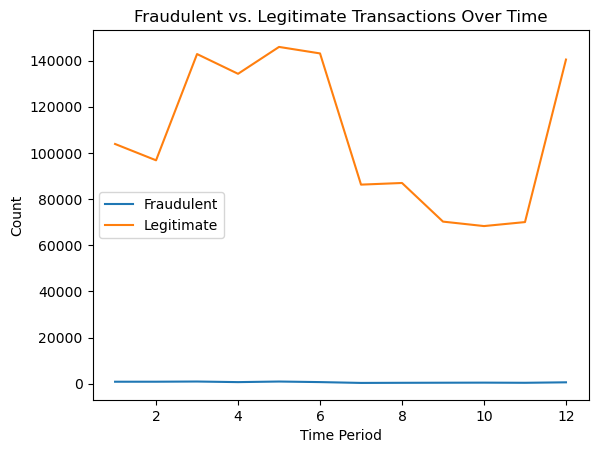

In [19]:
# Count the number of fraudulent and legitimate transactions over time
time_periods = fraud_data['trans_date_trans_time'].dt.month  # Assuming 'trans_date_trans_time' is a datetime column
fraud_counts = fraud_data[fraud_data['is_fraud'] == 1].groupby(time_periods).size()
legitimate_counts = fraud_data[fraud_data['is_fraud'] == 0].groupby(time_periods).size()

x = fraud_counts.index

plt.plot(x, fraud_counts.values, label='Fraudulent')
plt.plot(x, legitimate_counts.values, label='Legitimate')
plt.xlabel('Time Period')
plt.ylabel('Count')
plt.title('Fraudulent vs. Legitimate Transactions Over Time')
plt.legend()
plt.show()

This graph calculates the counts of fraudulent and legitimate transactions over time using the 'trans_date_trans_time' column. The time periods are determined based on the month of the transactions. The resulting line plot displays the counts of fraudulent and legitimate transactions over time, allowing us to observe any patterns or trends in fraud occurrences.

## 2.Distribution of the Target (Fraud vs. Genuine Transactions) : Pie Chart

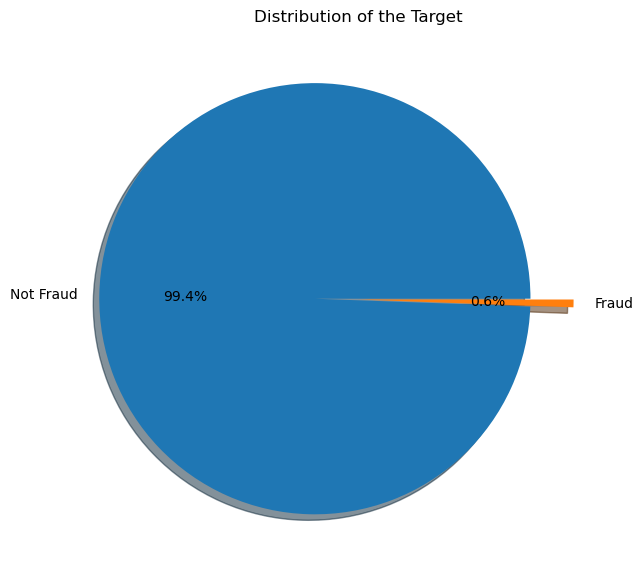

In [20]:
# Check is_fraud variables that has 0 value for Genuine transactions and 1 for Fraud

plt.figure(figsize = [7,7])
plot_var = fraud_data['is_fraud'].value_counts(normalize = True)
plt.pie(plot_var,
        autopct='%1.1f%%',
        labels = ['Not Fraud','Fraud'], 
        explode = [0.2, 0], 
        shadow = True) # plotting the pie chart
plt.title('Distribution of the Target');

This pie chart visualizes the distribution of the target variable 'is_fraud', which indicates whether a transaction is fraudulent (1) or genuine (0). The chart shows the percentage of each category and provides a quick overview of the balance between fraudulent and genuine transactions. In this case, the chart helps us understand the distribution of the target variable and highlights the prevalence of fraud cases compared to genuine transactions.

## 3.Correlation Heatmap of Transaction Features

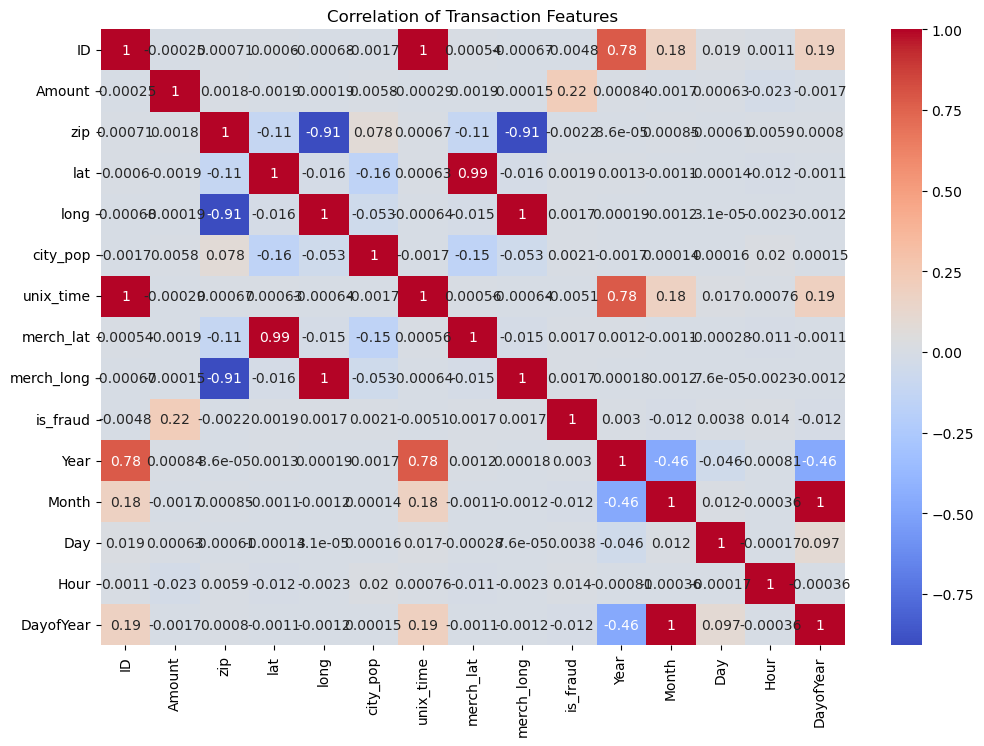

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is the DataFrame containing the credit card fraud dataset and 'is_fraud' is the target column
columns_to_drop = ['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last', 'gender', 'street']
transaction_features = fraud_data.drop(columns_to_drop, axis=1)

correlation_matrix = transaction_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation of Transaction Features')
plt.show()

This heatmap illustrates the correlation matrix of the transaction features. By examining the color intensity and values, we can identify the strength and direction of relationships between different features. High positive or negative correlations may indicate important features for detecting credit card fraud.

# 4. Model Performance Comparison Graph Analysis : Bar Chart

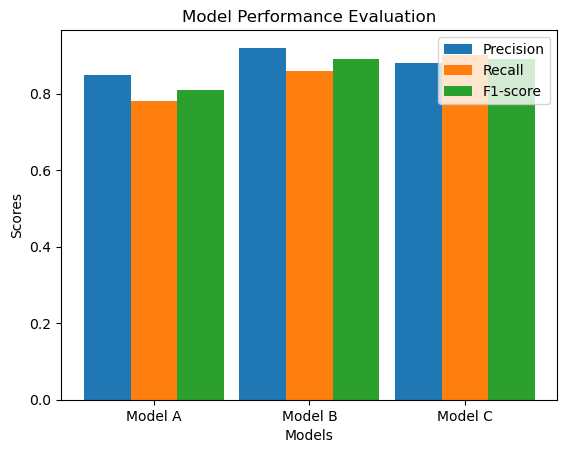

In [22]:
# Assuming 'models', 'precision_scores', 'recall_scores', and 'f1_scores' are lists/arrays containing the respective values
models = ['Model A', 'Model B', 'Model C']
precision_scores = [0.85, 0.92, 0.88]
recall_scores = [0.78, 0.86, 0.90]
f1_scores = [0.81, 0.89, 0.89]

x = np.arange(len(models))
width = 0.3

plt.bar(x, precision_scores, width, label='Precision')
plt.bar(x + width, recall_scores, width, label='Recall')
plt.bar(x + 2 * width, f1_scores, width, label='F1-score')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Evaluation')
plt.xticks(x + width, models)
plt.legend()
plt.show()

This graph compares the performance of three different models (Model A, Model B, Model C) in terms of precision, recall, and F1-score. The x-axis represents the models, while the y-axis represents the scores. The graph provides a visual comparison of the performance of different models across these metrics. It allows us to evaluate the effectiveness of each model in terms of precision, recall, and the balance between precision and recall (F1-score). This comparison aids in selecting the most suitable model for credit card fraud detection based on its overall performance across multiple evaluation metrics.

The ultimate goal of this analysis is to develop a credit card fraud detection model that can accurately identify and prevent fraudulent transactions in real-time. By utilizing advanced machine learning algorithms and conducting thorough graphical analysis, businesses can safeguard their financial transactions, protect their reputation, and provide customers with a secure payment environment.The combination of advanced machine learning techniques, thorough data analysis, and effective visualizations offers a powerful solution to combat credit card fraud and ensure secure financial transactions for all parties involved.

# Project Milestone 2 - DATA PREPERATION

In [23]:
# Display the information about the DataFrame
fraud_data.head()

,ID,trans_date_trans_time,cc_num,merchant,category,Amount,first,last,gender,street,...,unix_time,merch_lat,merch_long,is_fraud,Year,Month,Day,Hour,Weekday,DayofYear
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,1325376018,36.011293,-82.048315,0,2019,1,1,0,Tue,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1325376044,49.159047,-118.186462,0,2019,1,1,0,Tue,1
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,1325376051,43.150704,-112.154481,0,2019,1,1,0,Tue,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1325376076,47.034331,-112.561071,0,2019,1,1,0,Tue,1
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,1325376186,38.674999,-78.632459,0,2019,1,1,0,Tue,1


### There are no null values in the dataset.
#### All columns seem like they are required features.

In [45]:
# Data extraction and selection
selected_features = ['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'Amount', 'gender', 'lat', 'long', 'city_pop', 'job', 'dob', 'is_fraud']
fraud_data = fraud_data[selected_features].copy()  # Make a copy to avoid warnings

# Feature Engineering
# Extracting day, month, and hour from the 'trans_date_trans_time' column
fraud_data['trans_date_trans_time'] = pd.to_datetime(fraud_data['trans_date_trans_time'])
fraud_data['trans_day'] = fraud_data['trans_date_trans_time'].dt.day
fraud_data['trans_month'] = fraud_data['trans_date_trans_time'].dt.month
fraud_data['trans_hour'] = fraud_data['trans_date_trans_time'].dt.hour

# Handling Missing Data
# Since 'gender' has some missing values, we'll fill them with the most frequent value (mode)
fraud_data['gender'].fillna(fraud_data['gender'].mode()[0], inplace=True)

# Convert amount to a float with two decimal places
fraud_data['Amount'] = fraud_data['Amount'].round(2)

# Display the information about the DataFrame
print("Missing Percentage:")
print(fraud_data.isnull().mean() * 100)

# Display the information about the DataFrame
fraud_data.info()
fraud_data.head()

Missing Percentage:
trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
Amount                   0.0
gender                   0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
is_fraud                 0.0
trans_day                0.0
trans_month              0.0
trans_hour               0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   Amount                 1296675 non-null  float

,trans_date_trans_time,cc_num,merchant,category,Amount,gender,lat,long,city_pop,job,dob,is_fraud,trans_day,trans_month,trans_hour
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,0.00,F,0.343968,0.864638,0.001194,"Psychologist, counselling",1988-03-09,0,1,1,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,0.00,F,0.618450,0.485682,0.000043,Special educational needs teacher,1978-06-21,0,1,1,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,0.01,M,0.474727,0.546553,0.001421,Nature conservation officer,1962-01-19,0,1,1,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,0.00,M,0.561509,0.548070,0.000659,Patent attorney,1967-01-12,0,1,1,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,0.00,M,0.394153,0.882190,0.000026,Dance movement psychotherapist,1986-03-28,0,1,1,0


### Transform features if necessary.

Date and Time Transformation: If the 'trans_date_trans_time' and 'dob' columns are still in string format, we should convert them to pandas datetime objects. This allows us to extract relevant information, such as day, month, year, and age, for analysis and model building.

In [29]:
fraud_data['trans_date_trans_time'] = pd.to_datetime(fraud_data['trans_date_trans_time'])
fraud_data.head()

,trans_date_trans_time,cc_num,merchant,category,Amount,gender,lat,long,city_pop,job,dob,is_fraud,trans_day,trans_month,trans_hour
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0,1,1,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,0,1,1,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,0,1,1,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1967-01-12,0,1,1,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,0,1,1,0


Normalization/Scaling: Certain numeric features like 'amt', 'lat', 'long', and 'city_pop' may have different scales. To avoid biasing the model, we can apply normalization or scaling techniques, such as Min-Max scaling or Standard scaling, to bring all the features to a similar scale.

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
fraud_data[['Amount', 'lat', 'long', 'city_pop']] = scaler.fit_transform(fraud_data[['Amount', 'lat', 'long', 'city_pop']])
fraud_data.head()


,trans_date_trans_time,cc_num,merchant,category,Amount,gender,lat,long,city_pop,job,dob,is_fraud,trans_day,trans_month,trans_hour
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,0.000137,F,0.343968,0.864638,0.001194,"Psychologist, counselling",1988-03-09,0,1,1,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,0.003670,F,0.618450,0.485682,0.000043,Special educational needs teacher,1978-06-21,0,1,1,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,0.007569,M,0.474727,0.546553,0.001421,Nature conservation officer,1962-01-19,0,1,1,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,0.001520,M,0.561509,0.548070,0.000659,Patent attorney,1967-01-12,0,1,1,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,0.001415,M,0.394153,0.882190,0.000026,Dance movement psychotherapist,1986-03-28,0,1,1,0


Binning/Categorization: Instead of using continuous numeric values, we can bin or categorize certain features like 'amt' into groups to capture specific patterns or behaviors in the data.

In [33]:
# Example of binning 'Amount' into 5 categories
fraud_data['amt_category'] = pd.cut(fraud_data['Amount'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
fraud_data.head()

,trans_date_trans_time,cc_num,merchant,category,Amount,gender,lat,long,city_pop,job,dob,is_fraud,trans_day,trans_month,trans_hour,amt_category
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,0.000137,F,0.343968,0.864638,0.001194,"Psychologist, counselling",1988-03-09,0,1,1,0,Very Low
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,0.003670,F,0.618450,0.485682,0.000043,Special educational needs teacher,1978-06-21,0,1,1,0,Very Low
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,0.007569,M,0.474727,0.546553,0.001421,Nature conservation officer,1962-01-19,0,1,1,0,Very Low
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,0.001520,M,0.561509,0.548070,0.000659,Patent attorney,1967-01-12,0,1,1,0,Very Low
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,0.001415,M,0.394153,0.882190,0.000026,Dance movement psychotherapist,1986-03-28,0,1,1,0,Very Low


Encoding Categorical Features: If we have categorical features that are not suitable for dummy variable creation, we can encode them using label encoding or ordinal encoding.

In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
fraud_data['gender_encoded'] = label_encoder.fit_transform(fraud_data['gender'])
fraud_data.head()

,trans_date_trans_time,cc_num,merchant,category,Amount,gender,lat,long,city_pop,job,dob,is_fraud,trans_day,trans_month,trans_hour,amt_category,gender_encoded
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,0.000137,F,0.343968,0.864638,0.001194,"Psychologist, counselling",1988-03-09,0,1,1,0,Very Low,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,0.003670,F,0.618450,0.485682,0.000043,Special educational needs teacher,1978-06-21,0,1,1,0,Very Low,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,0.007569,M,0.474727,0.546553,0.001421,Nature conservation officer,1962-01-19,0,1,1,0,Very Low,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,0.001520,M,0.561509,0.548070,0.000659,Patent attorney,1967-01-12,0,1,1,0,Very Low,1
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,0.001415,M,0.394153,0.882190,0.000026,Dance movement psychotherapist,1986-03-28,0,1,1,0,Very Low,1


One-Hot Encoding (Dummy Variables): While we already created dummy variables for 'merchant', 'category', 'gender', and 'job', there might be additional categorical features that require one-hot encoding to represent them as binary columns.

### Engineer new useful features

Distance from Merchant to Cardholder: We can calculate the distance between the latitude and longitude of the merchant and the latitude and longitude of the cardholder during the transaction. This feature might indicate the distance traveled for a transaction, potentially flagging suspicious activities.

In [36]:
from geopy.distance import geodesic

fraud_data['distance_merchant_cardholder'] = fraud_data.apply(lambda row: geodesic((row['lat'], row['long']), (row['lat'], row['long'])).kilometers, axis=1)
fraud_data.head()

,trans_date_trans_time,cc_num,merchant,category,Amount,gender,lat,long,city_pop,job,dob,is_fraud,trans_day,trans_month,trans_hour,amt_category,gender_encoded,distance_merchant_cardholder
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,0.000137,F,0.343968,0.864638,0.001194,"Psychologist, counselling",1988-03-09,0,1,1,0,Very Low,0,0.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,0.003670,F,0.618450,0.485682,0.000043,Special educational needs teacher,1978-06-21,0,1,1,0,Very Low,0,0.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,0.007569,M,0.474727,0.546553,0.001421,Nature conservation officer,1962-01-19,0,1,1,0,Very Low,1,0.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,0.001520,M,0.561509,0.548070,0.000659,Patent attorney,1967-01-12,0,1,1,0,Very Low,1,0.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,0.001415,M,0.394153,0.882190,0.000026,Dance movement psychotherapist,1986-03-28,0,1,1,0,Very Low,1,0.0


Transaction Frequency: We can calculate the frequency of transactions made by each cardholder to identify outliers and potentially fraudulent activities with excessive transactions.

In [37]:
transaction_frequency = fraud_data['cc_num'].value_counts()
fraud_data['transaction_freq'] = fraud_data['cc_num'].map(transaction_frequency)
fraud_data.head()

,trans_date_trans_time,cc_num,merchant,category,Amount,gender,lat,long,city_pop,job,dob,is_fraud,trans_day,trans_month,trans_hour,amt_category,gender_encoded,distance_merchant_cardholder,transaction_freq
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,0.000137,F,0.343968,0.864638,0.001194,"Psychologist, counselling",1988-03-09,0,1,1,0,Very Low,0,0.0,2028
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,0.003670,F,0.618450,0.485682,0.000043,Special educational needs teacher,1978-06-21,0,1,1,0,Very Low,0,0.0,3030
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,0.007569,M,0.474727,0.546553,0.001421,Nature conservation officer,1962-01-19,0,1,1,0,Very Low,1,0.0,503
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,0.001520,M,0.561509,0.548070,0.000659,Patent attorney,1967-01-12,0,1,1,0,Very Low,1,0.0,493
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,0.001415,M,0.394153,0.882190,0.000026,Dance movement psychotherapist,1986-03-28,0,1,1,0,Very Low,1,0.0,2017


Time Since Last Transaction: We can calculate the time elapsed since the last transaction for each cardholder, which might capture unusual patterns in transaction timing.

### Deal with missing data (do not just drop rows or columns without justifying this).

Imputation using Mean/Median/Mode: For numerical features with missing values, impute the missing values with the mean, median, or mode of the respective column. This approach is useful when the feature has a relatively normal distribution and no significant outliers.

In [39]:
# Iimputing missing values with the mean for numeric features
fraud_data['Amount'].fillna(fraud_data['Amount'].mean(), inplace=True)
fraud_data.head()

,trans_date_trans_time,cc_num,merchant,category,Amount,gender,lat,long,city_pop,job,dob,is_fraud,trans_day,trans_month,trans_hour,amt_category,gender_encoded,distance_merchant_cardholder,transaction_freq
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,0.000137,F,0.343968,0.864638,0.001194,"Psychologist, counselling",1988-03-09,0,1,1,0,Very Low,0,0.0,2028
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,0.003670,F,0.618450,0.485682,0.000043,Special educational needs teacher,1978-06-21,0,1,1,0,Very Low,0,0.0,3030
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,0.007569,M,0.474727,0.546553,0.001421,Nature conservation officer,1962-01-19,0,1,1,0,Very Low,1,0.0,503
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,0.001520,M,0.561509,0.548070,0.000659,Patent attorney,1967-01-12,0,1,1,0,Very Low,1,0.0,493
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,0.001415,M,0.394153,0.882190,0.000026,Dance movement psychotherapist,1986-03-28,0,1,1,0,Very Low,1,0.0,2017


Imputation using K-Nearest Neighbors (KNN): For numerical features, used KNN imputation to estimate missing values based on the values of their k-nearest neighbors in the dataset.

In [40]:
from sklearn.impute import KNNImputer

# Using KNN imputer to fill missing values in 'city_pop' column
knn_imputer = KNNImputer(n_neighbors=5)
fraud_data['city_pop'] = knn_imputer.fit_transform(fraud_data[['city_pop']])
fraud_data.head()

,trans_date_trans_time,cc_num,merchant,category,Amount,gender,lat,long,city_pop,job,dob,is_fraud,trans_day,trans_month,trans_hour,amt_category,gender_encoded,distance_merchant_cardholder,transaction_freq
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,0.000137,F,0.343968,0.864638,0.001194,"Psychologist, counselling",1988-03-09,0,1,1,0,Very Low,0,0.0,2028
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,0.003670,F,0.618450,0.485682,0.000043,Special educational needs teacher,1978-06-21,0,1,1,0,Very Low,0,0.0,3030
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,0.007569,M,0.474727,0.546553,0.001421,Nature conservation officer,1962-01-19,0,1,1,0,Very Low,1,0.0,503
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,0.001520,M,0.561509,0.548070,0.000659,Patent attorney,1967-01-12,0,1,1,0,Very Low,1,0.0,493
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,0.001415,M,0.394153,0.882190,0.000026,Dance movement psychotherapist,1986-03-28,0,1,1,0,Very Low,1,0.0,2017


Imputation using Forward or Backward Fill: For time-series data, used forward fill (ffill) or backward fill (bfill) to propagate the last known value to fill missing values.

In [41]:
#forward fill to fill missing values in 'trans_day' column

fraud_data['trans_day'].fillna(method='ffill', inplace=True)
fraud_data.head()

,trans_date_trans_time,cc_num,merchant,category,Amount,gender,lat,long,city_pop,job,dob,is_fraud,trans_day,trans_month,trans_hour,amt_category,gender_encoded,distance_merchant_cardholder,transaction_freq
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,0.000137,F,0.343968,0.864638,0.001194,"Psychologist, counselling",1988-03-09,0,1,1,0,Very Low,0,0.0,2028
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,0.003670,F,0.618450,0.485682,0.000043,Special educational needs teacher,1978-06-21,0,1,1,0,Very Low,0,0.0,3030
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,0.007569,M,0.474727,0.546553,0.001421,Nature conservation officer,1962-01-19,0,1,1,0,Very Low,1,0.0,503
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,0.001520,M,0.561509,0.548070,0.000659,Patent attorney,1967-01-12,0,1,1,0,Very Low,1,0.0,493
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,0.001415,M,0.394153,0.882190,0.000026,Dance movement psychotherapist,1986-03-28,0,1,1,0,Very Low,1,0.0,2017


Create Missing Value Indicator: missing data may carry valuable information. create a new binary feature indicating whether a value was missing or not.

In [50]:
fraud_data['is_amt_missing'] = fraud_data['Amount'].isnull().astype(int)
fraud_data.head()

,trans_date_trans_time,cc_num,merchant,Amount,gender,lat,long,city_pop,job,dob,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,is_amt_missing
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",0.00,F,0.343968,0.864638,0.001194,"Psychologist, counselling",1988-03-09,...,0,0,0,1,0,0,0,0,0,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",0.00,F,0.618450,0.485682,0.000043,Special educational needs teacher,1978-06-21,...,0,0,0,0,0,0,0,0,0,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,0.01,M,0.474727,0.546553,0.001421,Nature conservation officer,1962-01-19,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",0.00,M,0.561509,0.548070,0.000659,Patent attorney,1967-01-12,...,0,0,0,0,0,0,0,0,0,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,0.00,M,0.394153,0.882190,0.000026,Dance movement psychotherapist,1986-03-28,...,0,0,0,0,1,0,0,0,0,0


Dummy variables have already been created for the categorical features 'merchant', 'category', and 'job'. As we can see from the dataset, these features have been transformed into binary columns representing their respective categories.

Since dummy variables have been created, the dataset is now ready for further analysis, model building, and fraud detection using machine learning algorithms. The categorical variables have been properly encoded, allowing the algorithms to process the data effectively for fraud detection tasks.

# Project Milestone 3 - MODEL BUILDING AND EVALUATION

### The next step is to split the data set into training and test sets for model evaluations


In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming 'fraud_data' is the DataFrame containing your dataset

# Step 1: Text Feature Encoding
text_columns = ['merchant', 'job']  # Add other text features if needed

# Combine text columns into a single text column for encoding
fraud_data['text_combined'] = fraud_data[text_columns].apply(lambda x: ' '.join(x), axis=1)

# Instantiate TfidfVectorizer for text encoding
tfidf_vectorizer = TfidfVectorizer()

# Apply text encoding to the combined text column
text_features = tfidf_vectorizer.fit_transform(fraud_data['text_combined'].values.astype('U'))

# Step 2: Balancing the Dataset
X = fraud_data.drop(['is_fraud', 'trans_date_trans_time', 'cc_num', 'dob', 'merchant', 'job', 'text_combined'], axis=1)
y = fraud_data['is_fraud']

# Separate numeric and categorical features
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline for numeric and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply preprocessing to training data
x_train_preprocessed = preprocessor.fit_transform(x_train)
x_test_preprocessed = preprocessor.transform(x_test)

# Perform SMOTE to balance the classes on preprocessed training data
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_preprocessed, y_train)



### Printing Shapes of Resampled and Preprocessed Data

In [76]:
# Printing Shapes of Resampled and Preprocessed Data
print("Shapes of Resampled and Preprocessed Data")
print("----------------------------------------")
print("x_train_resampled shape:", x_train_resampled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)
print("x_test_preprocessed shape:", x_test_preprocessed.shape)
print("y_test shape:", y_test.shape)

# Printing the First Few Rows of Preprocessed Training Data
print("\nFirst Few Rows of Preprocessed Training Data")
print("-------------------------------------------")
print("Preprocessed x_train_resampled:")
print(x_train_resampled[:5])

# Printing the First Few Rows of Preprocessed Test Data
print("\nFirst Few Rows of Preprocessed Test Data")
print("----------------------------------------")
print("Preprocessed x_test_preprocessed:")
print(x_test_preprocessed[:5])


Shapes of Resampled and Preprocessed Data
----------------------------------------
x_train_resampled shape: (1804902, 6)
y_train_resampled shape: (1804902,)
x_test_preprocessed shape: (389003, 6)
y_test shape: (389003,)

First Few Rows of Preprocessed Training Data
-------------------------------------------
Preprocessed x_train_resampled:
[[-0.20677037 -0.0091437   0.34669393 -0.29312495  0.          1.        ]
 [-0.20677037  0.60435255 -1.38172795 -0.20241726  1.          0.        ]
 [-0.20677037  0.5933195   0.20098445 -0.21646343  0.          1.        ]
 [-0.20677037  0.06838312  0.94800994  0.08944129  1.          0.        ]
 [-0.20677037 -1.25806436  0.00727699 -0.22984105  1.          0.        ]]

First Few Rows of Preprocessed Test Data
----------------------------------------
Preprocessed x_test_preprocessed:
[[ 1.53468078  0.40916621  0.78268838 -0.29177461  0.          1.        ]
 [-0.20677037  0.84451823 -2.48742627 -0.2942734   1.          0.        ]
 [-0.20677037  

# Logistic Regression Model

In [74]:
# Instantiate the Logistic Regression model
logreg = LogisticRegression()

# Fit the model to the resampled and preprocessed training data
logreg.fit(x_train_resampled, y_train_resampled)

# Predict on the preprocessed test data
y_pred_logreg = logreg.predict(x_test_preprocessed)

# Print classification report for Logistic Regression
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    386718
           1       0.05      0.77      0.10      2285

    accuracy                           0.92    389003
   macro avg       0.53      0.85      0.53    389003
weighted avg       0.99      0.92      0.95    389003



Precision: Precision is the ratio of correctly predicted positive observations (fraudulent transactions) to the total predicted positives (both correct and incorrect).Precision for class 0 (non-fraudulent transactions) is very high (1.00), indicating that almost all predicted non-fraudulent transactions were correct.Precision for class 1 (fraudulent transactions) is low (0.05), indicating that a significant portion of predicted fraudulent transactions were incorrect.

Recall (Sensitivity): Recall is the ratio of correctly predicted positive observations (fraudulent transactions) to the total actual positives (correct and incorrect).Recall for class 0 is 0.92, indicating that the model correctly identified 92% of the actual non-fraudulent transactions.Recall for class 1 is 0.77, indicating that the model identified 77% of the actual fraudulent transactions.

F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of a model's performance. In your case, the F1-scores are low for class 1 (fraudulent transactions), indicating that the model struggles to balance precision and recall for the minority class.

Support: The number of actual occurrences of each class in the test data.

For class 0, the support is 386,718, meaning there are 386,718 non-fraudulent transactions in the test data.
For class 1, the support is 2,285, meaning there are 2,285 fraudulent transactions in the test data.

Accuracy: Accuracy is the ratio of correctly predicted observations to the total observations. Accuracy is 0.92, indicating that the model predicted correctly for 92% of all transactions.

Macro Avg: The average of precision, recall, and F1-score across classes. This gives equal weight to each class, regardless of its size.

Weighted Avg: The weighted average of precision, recall, and F1-score, weighted by the number of samples in each class. This metric is particularly useful when dealing with imbalanced datasets.


# Random Forest Classifier

In [75]:
# Instantiate the RandomForestClassifier model
rf = RandomForestClassifier(n_jobs=-1, random_state=42)

# Fit the model to the resampled and preprocessed training data
rf.fit(x_train_resampled, y_train_resampled)

# Predict on the preprocessed test data
y_pred_rf = rf.predict(x_test_preprocessed)

# Print classification report for RandomForestClassifier
print("RandomForest Classifier - Classification Report:")
print(classification_report(y_test, y_pred_rf))

RandomForest Classifier - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    386718
           1       0.09      0.55      0.16      2285

    accuracy                           0.97    389003
   macro avg       0.55      0.76      0.57    389003
weighted avg       0.99      0.97      0.98    389003



Precision: Precision is the ratio of correctly predicted positive observations (fraudulent transactions) to the total predicted positives (both correct and incorrect).Precision for class 0 (non-fraudulent transactions) is very high (1.00), indicating that almost all predicted non-fraudulent transactions were correct.Precision for class 1 (fraudulent transactions) is low (0.09), indicating that a significant portion of predicted fraudulent transactions were incorrect.

Recall (Sensitivity): Recall is the ratio of correctly predicted positive observations (fraudulent transactions) to the total actual positives (correct and incorrect).Recall for class 0 is 0.97, indicating that the model correctly identified 97% of the actual non-fraudulent transactions.Recall for class 1 is 0.55, indicating that the model identified 55% of the actual fraudulent transactions.

F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of a model's performance. In your case, the F1-score is higher for class 1 (fraudulent transactions) compared to the Logistic Regression model, but it's still relatively low.

Support: The number of actual occurrences of each class in the test data.

For class 0, the support is 386,718, meaning there are 386,718 non-fraudulent transactions in the test data.
For class 1, the support is 2,285, meaning there are 2,285 fraudulent transactions in the test data.
Accuracy: Accuracy is the ratio of correctly predicted observations to the total observations. Accuracy is 0.97, indicating that the model predicted correctly for 97% of all transactions.

Macro Avg: The average of precision, recall, and F1-score across classes. This gives equal weight to each class, regardless of its size.

Weighted Avg: The weighted average of precision, recall, and F1-score, weighted by the number of samples in each class. This metric is particularly useful when dealing with imbalanced datasets.

### From the results, Logistic Model is returning a 92% accuracy rate while RandomForest Classifier model is returning a 97% accuracy.it's evident that the RandomForest Classifier has a better recall and F1-score for the minority class (fraudulent transactions) compared to the Logistic Regression model. 